<a href="https://colab.research.google.com/github/Yashmi16/EAI_Assignments/blob/master/YashmiSevak_Week3_LabReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab we will train a neural network model to classify images of clothing. 

The lab is designed to be run using Google Colab, but also can be run as a normal jupyter notebook with minor modifications.

This lab uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

# *Yashmi Shirish Sevak*
# *EAI6000*
# *03-07-2020*

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Examine the dataset size.
1. What are the sizes of each image? 
2. How many categories are there?
3. How many images are there in the test and training sets?
4. What are the range of values for the images? 

In [4]:
#The sizes of each image
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


The sizes of each image are 28*28

In [5]:
#categories
len(class_names)

10

There are 10 categories

In [6]:
#images in the test and training sets
print(len(train_images)) #no.of images in training set
print(len(test_images)) #no.of images in testing set

60000
10000


The training data set has 60000 images and the test data set has 10000 images.

In [7]:
#range of values for the images
print('Train_images', train_images.min(), train_images.max())
print('Test_images', test_images.min(), test_images.max())

Train_images 0 255
Test_images 0 255


By inspecting the first image, we understood that the pixel values fall between the range 0 to 255

Preprocess the data by scaling the pixel values of all images to fall between 0 and 1.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format  display the first 10 images from the *training set* and display the class name below each image.


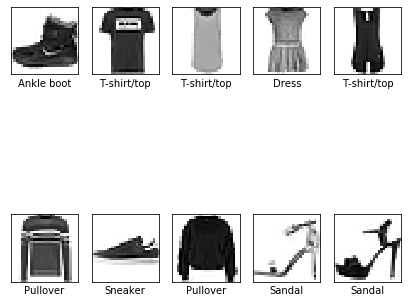

In [9]:
plt.figure(figsize=(7,7))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
  plt.xticks([])
  plt.yticks([])
plt.show()

## Build the model

Using Keras, build a neural network with a single hidden layer consisting of 64 neurons. Remember that you will either have to reshape the image data into 1D vectors, or use a flatten layer at the input.
1. Set up the model layers
2. Compile the model 
3. Print the model summary

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
             # loss= 'sparse_categorical_crosstronpy'
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


keras.layers.Flatten transforms the image data from 2D array(28 * 28pixels) to 1D array(28 * 28=784pixels). After flattening the pixels, we have created a neural network with single layer of 64 neurons. This layer is 64-node softmax layer that returns an array of 10 proability scores that sum to 1. Each node has a probability score which indicates the probability that the current image belongs to one of the 10 classes.

## Train the model

Train the model on the training images for 20 epochs.




In [13]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5296 - accuracy: 0.8156
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4064 - accuracy: 0.8570
Epoch 3/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3639 - accuracy: 0.8694
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3396 - accuracy: 0.8765
Epoch 5/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3202 - accuracy: 0.8834
Epoch 6/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3051 - accuracy: 0.8882
Epoch 7/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2931 - accuracy: 0.8931
Epoch 8/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2832 - accuracy: 0.8957
Epoch 9/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2734 - accuracy: 0.8990
Epoch 10/20
60

Loss and accuracy metrics are shown after training the model.
This model reaches an accuracy of about 0.92 or 92% on the training data. The loss value is 0.2099

Evaluation of accuracy of the model on the test data. How does it compare with the training accuracy? Is it likely to be an overfitting or underfitting model?

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.3645 - accuracy: 0.8749

Test accuracy: 0.8749


The test accuracy is less when compared with the training accuracy, which means it is an overfitted model.

### Make predictions

The outputs layer of the model contains predictions about the classification for each image. 

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
class_predictions = model.predict_classes(test_images)
prediction_probabilities = probability_model.predict(test_images)

Examine the shape of the variable 'prediction_probabilities'. How is it different from class_predictions? What do the dimensions correspond to?

In [16]:
print(prediction_probabilities.shape)
print(prediction_probabilities)
prediction_probabilities[0]
np.argmax(prediction_probabilities[0])

(10000, 10)
[[1.1197270e-09 3.7814163e-14 2.9075213e-09 ... 5.7836655e-03
  6.7915407e-06 9.9409986e-01]
 [1.6279493e-05 1.6588632e-18 9.9913436e-01 ... 5.7292631e-14
  9.0132547e-11 7.3026873e-24]
 [1.1645529e-07 9.9999988e-01 3.9584334e-12 ... 5.0012322e-22
  1.4378907e-17 8.9295760e-23]
 ...
 [6.4118408e-06 4.6640278e-12 2.5099349e-05 ... 2.3233247e-06
  9.9604142e-01 2.2705384e-09]
 [1.8544403e-08 9.9999893e-01 5.5850019e-10 ... 9.5666637e-15
  2.4846186e-11 8.9224153e-16]
 [3.3741976e-09 8.7791233e-16 9.7951300e-08 ... 8.4146006e-05
  1.1239391e-06 2.0459503e-08]]


9

In [17]:
print(class_predictions.shape)
print(class_predictions)
class_predictions[0]

(10000,)
[9 2 1 ... 8 1 5]


9

Prediction_probabilities predict the probability of the image corresponding to each of the 10 different categories. 
class_predictions determine the classname or category to where the image belongs. 
If we consider prediction_probabilities[0], the highest probability is 99% for the classname 9 which is 'Ankle Boot'. And if we consider the class_predictions[0], the output is 9, which is that the class of the image in the prediction_probabilities[0]. The dimensions of the prediction_probabilities, correspond to the 10000 image rows, with 10 probability scores in each row. The dimesions of class_prediction corresponds to the class names of the 10000 images.

The following functions plot the image and a bar graph of the predicted probabilities. Using these functions, make a plot of the first 25 test images that were incorrectly classified along with their predicted probabilities. Interpret these images - what sort of images tend to be misclassified?

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

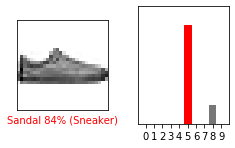

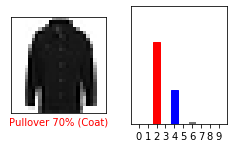

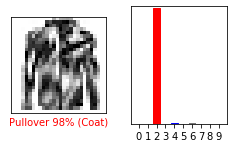

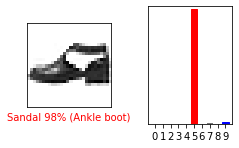

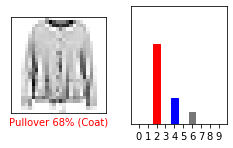

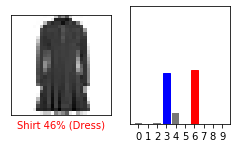

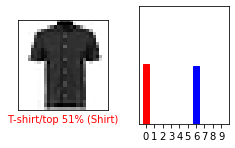

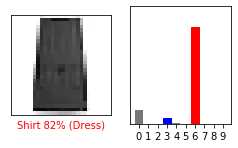

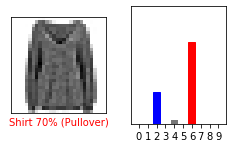

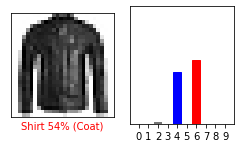

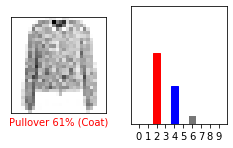

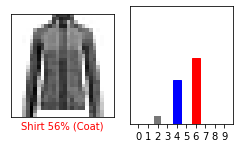

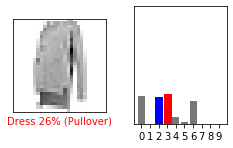

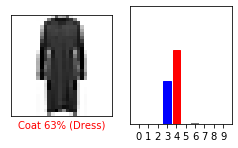

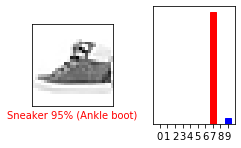

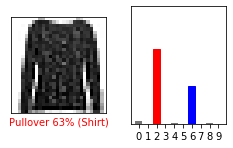

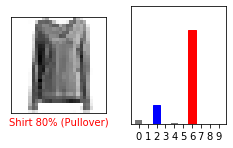

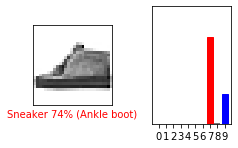

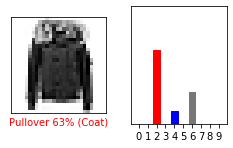

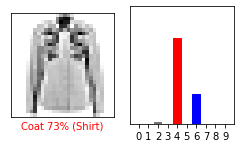

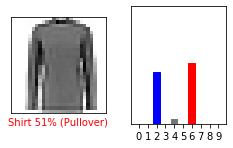

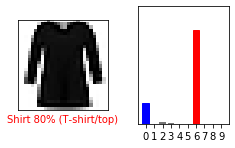

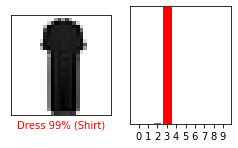

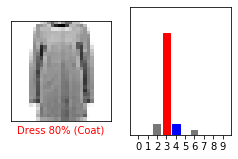

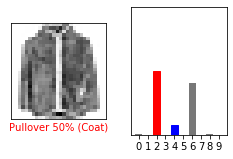

In [19]:
count = 0    
i = 0
while count < 25:
  if np.argmax(prediction_probabilities[i]) != test_labels[i]:
    count += 1
    num_rows = 5
    num_cols = 5
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    plt.subplot(num_rows, 2*num_cols + 2, 2*count+1)
    plot_image(i, prediction_probabilities[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols + 2, 2*count+2)
    plot_value_array(i, prediction_probabilities[i], test_labels)
    plt.tight_layout()
    plt.show()

  i += 1

Variety of the similar patterns on all classes affect the performance of the classifier. Jacket, Shirt, and Long-sleeve blouse, they all have similar patterns: long sleeves (or not!), buttons (or not!) and so on. Also, ankel boot is replaced by shoe, similarly dress is replaced only by clothes and not any foot ware type. 

Plot a confusion matrix of the predictions. Which misclassifications are the most common?

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

In [21]:
confusion_matrix(test_labels ,class_predictions)

array([[760,   1,  11,  38,   3,   3, 175,   0,   9,   0],
       [  4, 967,   0,  19,   2,   0,   6,   0,   2,   0],
       [ 11,   2, 793,  14,  63,   0, 116,   0,   1,   0],
       [ 10,   4,   9, 910,  30,   1,  33,   0,   2,   1],
       [  0,   0, 136,  28, 708,   0, 127,   0,   1,   0],
       [  0,   0,   0,   1,   0, 953,   0,  26,   1,  19],
       [ 90,   1,  57,  32,  45,   0, 766,   0,   9,   0],
       [  0,   0,   0,   0,   0,   9,   0, 963,   1,  27],
       [  4,   0,   5,   6,   5,   2,   6,   5, 966,   1],
       [  0,   0,   0,   0,   0,   5,   1,  31,   0, 963]])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

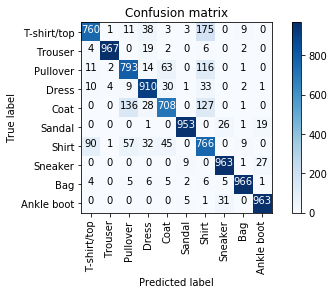

In [23]:
confusion_mtx = confusion_matrix(test_labels ,class_predictions)
plot_confusion_matrix(confusion_mtx, class_names)

There are more number of misclassifications for T-shirt/top which are classified as shirt.
Followed by coats missclassified as pullover and shirt misclassified as t-shirt/top, pullover and coat. 